**INTRODUCTION**

The objective is to identify different groupings or "clusters" within a dataset for the violent crime category. Using a machine language algorithm, the tool builds groups in which items inside a comparable group have, on average, similar features.

**ABOUT THE DATA**

The data here emerges from an FBI source that keeps track of crime rates in each state from 1960 to 2019. The data includes two types of crime: property crime rate and violent crime rate. However, we will focus mostly on violent crime rate because that is what the decision tree analysis was based on. There are four different types of violent crime: assault, rape, robbery, and murder.

**DATA CLEANING AND VISUALIZATION**

During the data cleaning procedure, raw data was cleansed, and the cleaned data is then input for the clustering procedure. As violent crime is the primary focus of the clustering, we extract the violent crime rate data from the dataset into a separate dataset and then visualize the data to determine the relationship between the variables. 


IMPORT LIBRARIES

In [40]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette='Set2')
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')
# Importing relevent libraries for clustering. 
# We will use KMeans, AgglomerativeClustering, MeanShift, Birch, and DBSCAN

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle
from sklearn.cluster import Birch


IMPORT DATA

In [41]:
# Read the data
df = pd.read_csv("../../data/modified-data/cleaned_state_crime_record_data.csv")
df.head()

,State,Year,Population,Property_Crime_Rate,Property_Burglary_Rate,Property_Larceny_Rate,Property_Motor_Rate,Violent_Crime_Rate,Violent_Assault_Rate,Violent_Murder_Rate,Violent_Rape_Rate,Violent_Robbery_Rate
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,8.6,27.5
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,7.6,19.1
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,6.5,22.5
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,5.7,24.7
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,11.7,29.1


In [42]:
#create new column
df['Violent_label'] = df[['Violent_Assault_Rate', 'Violent_Murder_Rate','Violent_Rape_Rate','Violent_Robbery_Rate']].idxmax(axis=1)
#create table for only property crime datasets
violent_df = df[['Violent_Assault_Rate', 'Violent_Murder_Rate','Violent_Rape_Rate','Violent_Robbery_Rate','Violent_label']].copy()

DATA VISUALISATION

Text(0.5, 0.98, 'Pairplot for Violent Crime Rate from 1960-2019')

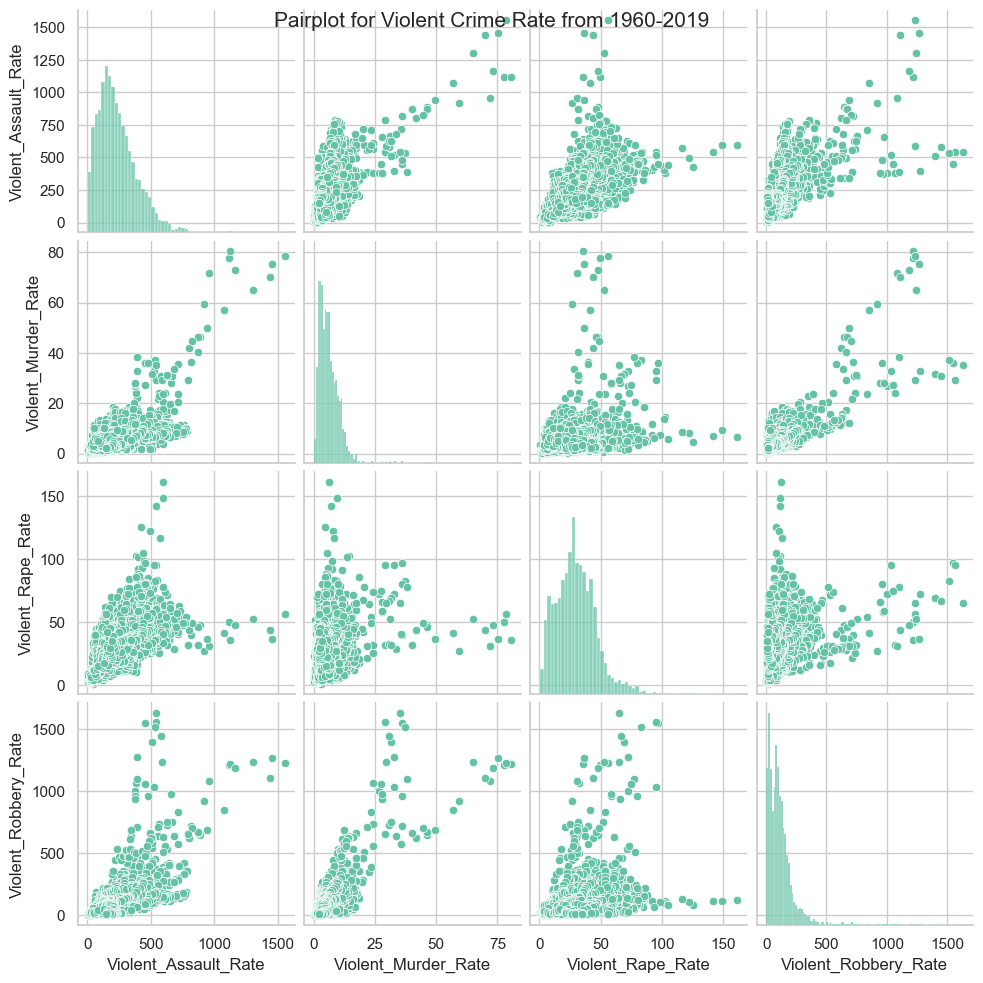

In [43]:
#visualize the data
figsize=(30,10)
pairplot = sns.pairplot(violent_df)
pairplot.fig.suptitle('Pairplot for Violent Crime Rate from 1960-2019', fontsize = 15)


According to the pairplot, there is a positive correlation between all variables.

**CLUSTERING**

Clustering is the process of splitting a population or set of data points into many groups in which the data points within each group are more similar to each other than to the data points within any of the other groups. This ensures that each group has data points that are more comparable to one another than to any other group's data points. It is, at its most basic level, a collection of items grouped according to the degrees to which they are similar to or distinct from the other items in the collection. It achieves this by scanning the unlabeled dataset for recurrent patterns, such as shape, size, color, and behavior, and then splitting the data depending on the presence or absence of these recurring patterns. Due to the nature of unsupervised learning, the algorithm receives no supervision and operates on unlabeled datasets. In addition, the datasets lack labels.


**CLUSTERING ALGORITHMS:**

Clustering techniques can be utilized to categorize data points into groups based on their shared commonalities with other data points. There is no established set of clustering success criteria. Clustering is a methodology for classifying unlabeled data. It depends largely on the particular user and the circumstances.

*Common cluster models:*

- Connectivity models, which construct models based on distance connectedness.

- Centroid models, which represent each cluster with a single mean vector

- Distribution models, which model clusters using statistical distributions

- Density models, which defines clustering as a densely connected region in data space.


**KMEANS**

K-means clustering is one of the simplest and most often used algorithms for unsupervised learning. A cluster is a collection of data items that are grouped together because they have certain characteristics. You will set a goal number, k, which corresponds to the required number of centers in the dataset. A centroid is a physical or fictitious location that marks the cluster's center. By reducing the sum of squares for each cluster, each data point is assigned to one of the clusters. In other words, the K-means algorithm identifies k centers, then places each data point in the cluster that is closest to it while minimizing the size of the centers. The term "means" in K-means refers to determining the center or arithmetic mean of the data.

Advantages of k-means:

- Relatively straightforward to implement.

- Scales to big data collections.

- Guarantees convergence.

- Possibility to warm-up the positions of centroids.

- Adapts readily to new examples.

- Generalizes to clusters of various sizes and forms, including elliptical clusters.


Disadvantages of k-means:

- Choosing k manually.

- Data of varied sizes and densities are clustered.

- Clustering outliers.

- Scaling with dimension count.



**CLUSTERING WITH RANDOM HYPER - PARAMETER: KMEANS ALGORITHM**

A random K value is taken. Here, k = 3 is employed as the initial label prediction step. Once the labels have been predicted, kmeans model clustering with the same k value, k = 3, is performed to examine the clusters.

In [44]:
# Split the dataset in X and y. 
# Since this is unsupervised learning, we will not use the y labels. 
# Normalizing the X data by using the StandardScaler function.

X = violent_df.drop('Violent_label', axis=1)
y = violent_df['Violent_label']
scaler = StandardScaler()
X = scaler.fit_transform(X)

KMEANS CLUSTERING FOR K = 3

In [45]:
# For k means clustering we will use the elbow method to find the optimal number of clusters. 
# we will use the inertia_ attribute to find the sum of squared distances of samples to their closest cluster center. 
# we will use the range of 1 to 10 clusters. plot the inertia_ values for each number of clusters. 
# make sure to save it in a dataframe and plot it using matplotlib.

inertia = pd.DataFrame(columns=['clusters', 'inertia', 'distortion'])
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia = inertia.append({'clusters': i, 'inertia': kmeans.inertia_, 'distortion': sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))/X.shape[0]}, ignore_index=True)
inertia

,clusters,inertia,distortion
0,1.0,12460.0,1.539448
1,2.0,8190.368723,1.228229
2,3.0,5301.55608,1.123453
3,4.0,4327.735197,0.986535
4,5.0,3812.255194,0.911249
5,6.0,3365.198723,0.890649
6,7.0,2946.399983,0.843668
7,8.0,2640.763725,0.80562
8,9.0,2450.515735,0.767369
9,10.0,2264.273317,0.728758


array([<AxesSubplot:xlabel='clusters'>, <AxesSubplot:xlabel='clusters'>],
      dtype=object)

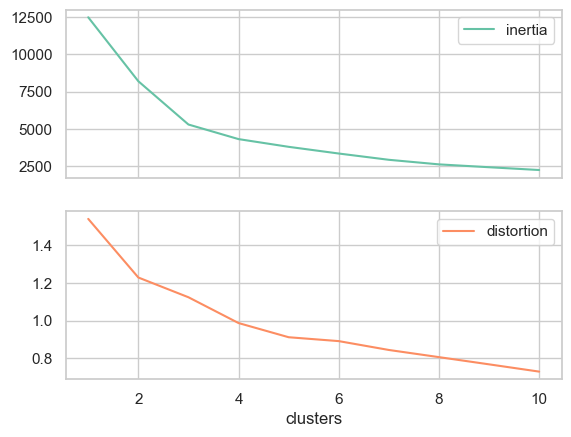

In [46]:
# plot distortion and inertia for kmeans, 
# you can either plot them seperately or use fig, ax = plt.subplots(1, 2) to plot them in the same figure. 
# Suggest the optimal number of clusters based on the plot.

inertia.plot.line(x="clusters", subplots=True)

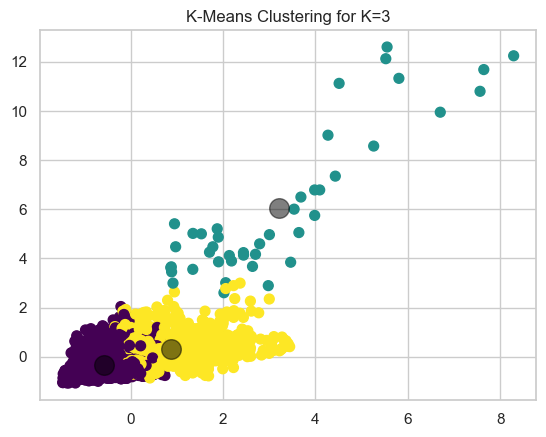

In [47]:
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.title('K-Means Clustering for K=3')
plt.show()

**HYPER-PARAMTER TUNING:**

Tuning hyper - parameters for unsupervised learning problems is often difficult due to a lack of validation ground truth. However, the bulk of clustering algorithms rely heavily on the selection of proper hyper - parameters. Numerous hyper - parameters must be given in advance for each method that conducts Clustering on a dataset. These hyper-parameters, however, must be adjusted with our dataset in mind. Using random hyper - parameters that do not match our dataset may result in improper clustering of datapoints. As a result, hyper-parameters are used to optimize their performance.

To perform hyper-parameter tuning, we must have functions employ a measure to identify the best Hyper-parameter (s). This statistic varies depending on the algorithm and the procedure within the algorithm. There are numerous methods for determining optimal value, including the Elbow technique, the Silhouette approach, the Grubbs method, and so on.



**HYPER-PARAMTER TUNING FOR KMEANS:**

For K-Means Algorithm, hyper-parameter is n_cluster.
There are two metods which are being used to find the optimal value:

1. ELBOW METHOD


By fitting the model with a range of values for, the "elbow" method can help choose the best number of clusters. If the line chart looks like an arm, the "elbow," or point where the curve bends, is a good sign that the model fits best at that point. "Elbow" will be marked in the visualizer with a dashed line.

Here, the k value is considered to range from 2 to 7. When the model is fit, we can see a line on the graph that marks the "elbow," which in this case is the best number.


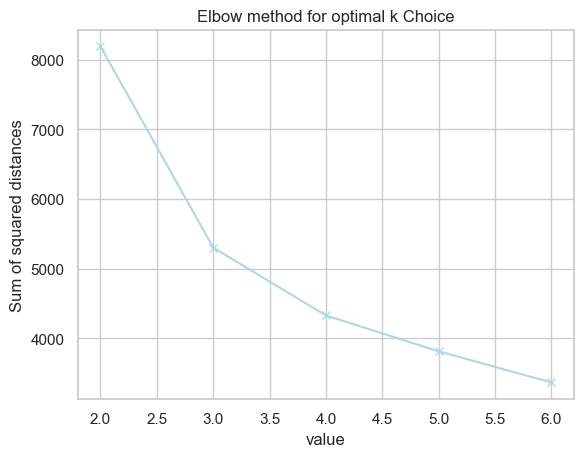

In [48]:
#Look at best values for k 
SS_dist = []

values_for_k=range(2,7)

for k_val in values_for_k:
    k_means = KMeans(n_clusters=k_val)
    model = k_means.fit(X)
    SS_dist.append(k_means.inertia_)
    

plt.plot(values_for_k, SS_dist, 'bx-', color='lightblue')
plt.xlabel('value')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal k Choice')
plt.show()

2. SILHOUETTE METHOD


The silhouette method can also be used to find the best number of clusters or other hyper-parameters and to check that the data in each cluster is consistent. This method figures out silhouette coefficients for each sample point and takes the average of all of them to get the silhouette score. It picks the set of hyper-parameters with the highest silhouette score. The silhouette value is a way to compare how similar an object is to other objects in its own cluster (separation).

Here, the k value is considered to range from 2 to 7. When the model is fit, we can see a line on the graph that marks the "silhouette," which in this case is the best number.

Text(0.5, 0, 'k values')

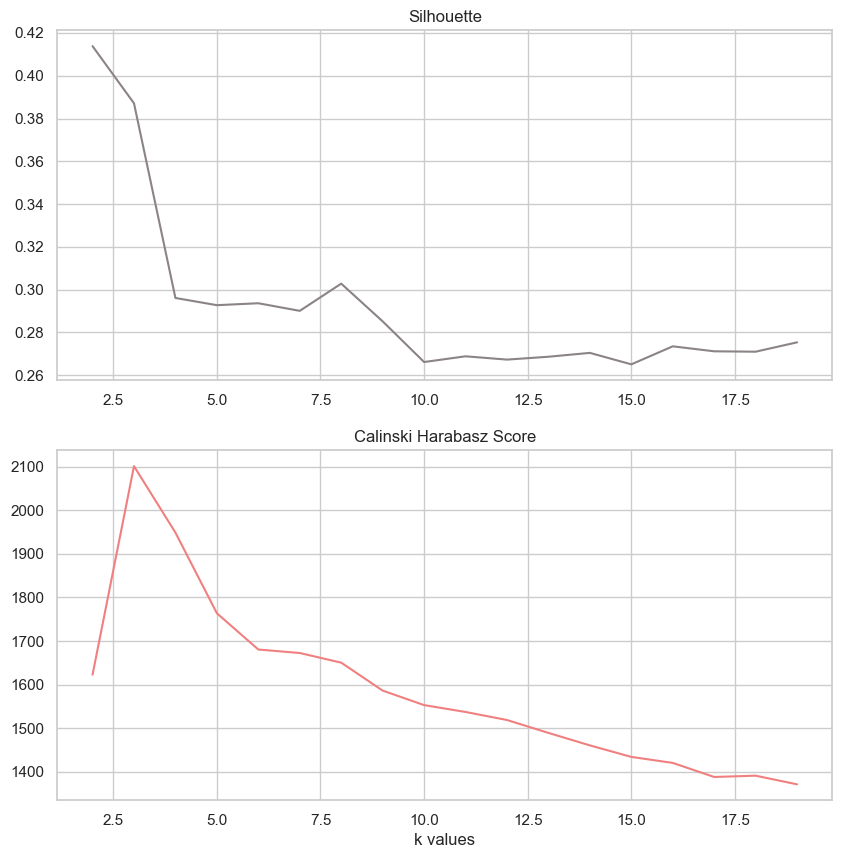

In [49]:
# Look at Silhouette
Sih=[]
Cal=[]
k_range=range(2,20)

for k in k_range:
    k_means_n = KMeans(n_clusters=k)
    model = k_means_n.fit(X)
    Pred = k_means_n.predict(X)
    labels_n = k_means_n.labels_
    R1=metrics.silhouette_score(X, labels_n, metric = 'euclidean')
    R2=metrics.calinski_harabasz_score(X, labels_n)
    Sih.append(R1)
    Cal.append(R2)


fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
ax1.plot(k_range,Sih, color="#8B8386")
ax1.set_title("Silhouette")
ax1.set_xlabel("")

ax2.plot(k_range,Cal, color='#F08080')
ax2.set_title("Calinski Harabasz Score")
ax2.set_xlabel("k values")

From the above methods, the optimal value is taken as 2 i.e. k = 2. Considering k =2, the data is fit into the k-means algorithm and proceeding with the scatter plot. Principal component analysis (PCA) is a way to reduce the number of dimensions in these kinds of datasets, making them easier to understand while losing as little information as possible. It does this by making new variables that are not related to each other and that gradually optimize variance.

K-MEAN CLUSTERING FOR K = 2

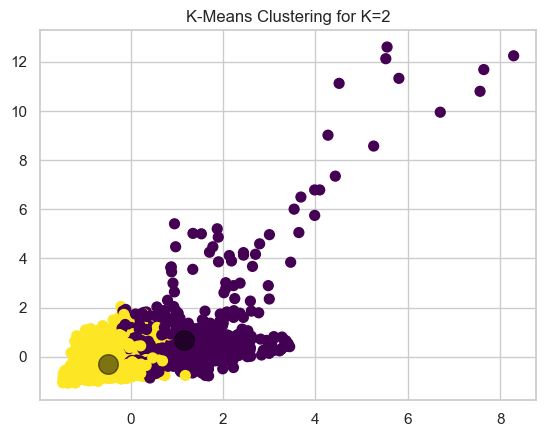

In [50]:
kmeans = KMeans(n_clusters=2, random_state=123)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.title('K-Means Clustering for K=2')
plt.show()

**DBSCAN: Density-Based Spatial Clustering of Applications with Noise**

DBSCAN is a density-based clustering technique that operates on the premise that clusters are clumps of data physically separated by less dense areas. It constructs a cluster from 'densely clustered' data points. It can locate groups in big spatial datasets by evaluating the regional density of the data points. The resistance to outliers is a noteworthy feature of DBSCAN clustering. It does not require us to know the number of clusters in advance, unlike K-Means, which requires us to supply the number of centroids.

The DBSCAN algorithm is described in detail below:

- DBSCAN generates its initial data point at random (non-visited points).

- This point's neighborhood is extracted using an epsilon distance.

- If there are enough data points in this region, the clustering mechanism initiates, and the current data point becomes the first point in the newest cluster; otherwise, it is classified as noise and is subsequently visited.

- Every other point within epsilon distance of the first point in the new cluster likewise joins it as a member of the same cluster. The steps taken to ensure that all previously added data points are also part of the same cluster are repeated for all newly added data points.

- The preceding two procedures are continued until all cluster nodes are identified. All of the points in the cluster's immediate neighborhood have been explored and categorized. When we've finished with the current cluster, we'll move on to the next one by retrieving and processing a previously unvisited point. This process is carried out until all of the data points have been checked off as visited.

Advantages of DSCAN:

- Doesn't need the number of clusters to be set up front.

- Able to tell when data is just noise while clustering.

- The DBSCAN algorithm can find clusters that are any size and any shape.

Disadvantages of DBSCAN:

- When clusters have different densities, the DBSCAN algorithm doesn't work.

- Fails if the dataset is a neck type.


In DBSCAN, the hyperparameters are Min points and epsilon.

- Min points: Min points ≥ dimensionality +1

If the set of data is more noisy, we use Min. Points are bigger because it's easy to get rid of noisy ones.

- Radius (Epsilon): Elbow method

We figure out the distance between each data point and then sort distances from farthest to closest, and then draw a graph between distance and point index. From the graph,we choose the best distance (epsilon) where the graph shows a sharp rise.





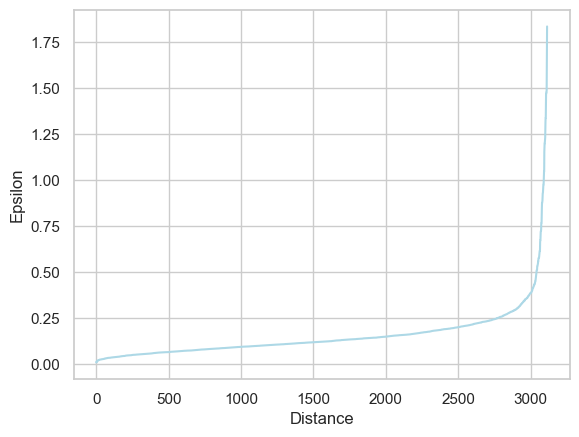

In [51]:
# we use nearestneighbors for calculating distance between points
from sklearn.neighbors import NearestNeighbors

# calculating distances
neigh=NearestNeighbors(n_neighbors=2)
distance=neigh.fit(X)
# indices and distance values
distances,indices=distance.kneighbors(X)
# Now sorting the distance increasing order
sorting_distances=np.sort(distances,axis=0)
# sorted distances
sorted_distances=sorting_distances[:,1]
# plot between distance vs epsilon
plt.plot(sorted_distances, color='lightblue')
plt.xlabel("Distance")
plt.ylabel("Epsilon")
plt.show()

In [52]:
# DBSCAN Clustering
# perform DBSCAN clustering. use the eps and min_samples parameters to find the optimal number of clusters. 
dbscan_df = pd.DataFrame(columns=['eps', 'min_samples', 'clusters', 'silhouette_score'])

for i in np.arange(0.1, 2.1, 0.1):
    
    for j in range(1, 11):
        
        dbscan = DBSCAN(eps=i, min_samples=j)
        dbscan.fit(X)
        
        if (len(set(dbscan.labels_) - set([-1])) > 1) & (len(set(dbscan.labels_) - set([-1])) < 11):
            dbscan_df = dbscan_df.append({'eps': i, 'min_samples': j, 'clusters': len(set(dbscan.labels_) - set([-1])), 'silhouette_score': silhouette_score(X, dbscan.labels_)}, ignore_index=True)
        
        else:
            dbscan_df = dbscan_df.append({'eps': i, 'min_samples': j, 'clusters': 0, 'silhouette_score': 0}, ignore_index=True)
        


Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

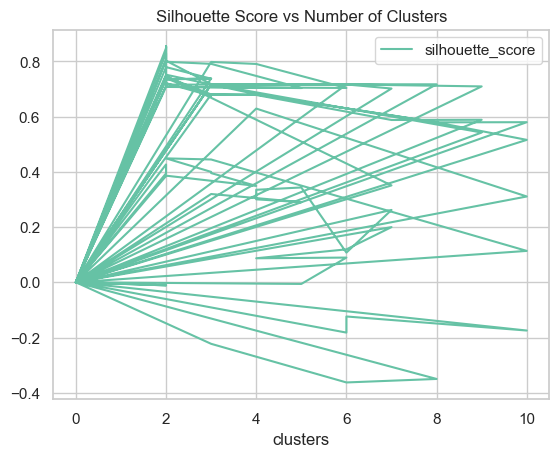

In [53]:
# plot the number of clusters vs the silhouette score. Suggest the optimal number of clusters based on the plot.
dbscan_df.plot.line(x='clusters', y='silhouette_score')
plt.title("Silhouette Score vs Number of Clusters")

DBSCAMN LABELS

In [54]:
optimal_cluster_size = dbscan_df['clusters'][dbscan_df['silhouette_score'] == max(dbscan_df['silhouette_score'])]
dbscan = DBSCAN(eps=1.7, min_samples=10)
dbscan.fit(X)
y_pred = dbscan.fit_predict(X)
labels_DB = dbscan.labels_
print(labels_DB)

[0 0 0 ... 0 0 0]


NUMBER OF POINTS ON EACH CLUSTER

In [55]:
import collections
collections.Counter(labels_DB)

Counter({0: 3071, -1: 34, 1: 10})

DBSCAN CLUSTER VISUALISATION

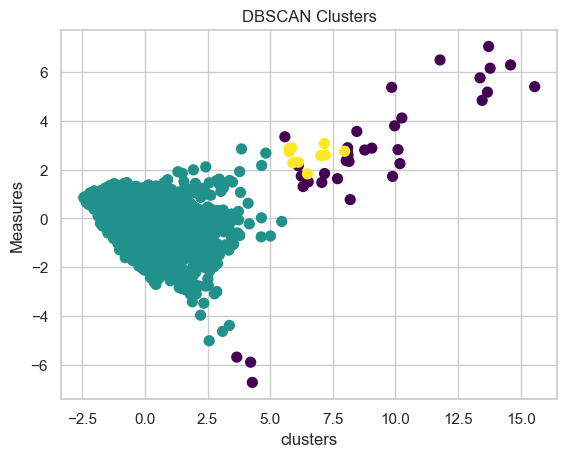

In [56]:
#plot clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_DB, s=50, cmap='viridis')
plt.xlabel('clusters')
plt.title('DBSCAN Clusters')
plt.ylabel('Measures')
plt.show()

SILHOUETTE COEFFICIENT

In [57]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels_DB))

Silhouette Coefficient: 0.707


**HIERARCHIAL CLUSTERING**

Hierarchical clustering methods join and divide existing clusters repeatedly to create multilayer clusters. This structure, in the form of a tree, displays the relative hierarchy of the groups (or dendrogram). The trunk of the tree is the single cluster that contains all of the others, while the leaves are the many other clusters that each contain exactly one sample.

Agglomerative hierarchical clustering (AHC):

With the AgglomerativeClustering object, you can do hierarchical clustering from the bottom up. This means that each observation is put into its own cluster before being combined with others. AgglomerativeClustering can be used with a large number of samples when paired with a connectivity matrix. However, it has a high computational cost when there are no restrictions on the connections between samples because it looks at all possible mergers at each step.


Advantages of AHC:

- AHC is easy to set up, and it can also arrange objects in a way that is helpful for the display.

- We don't have to know ahead of time how many clusters there will be. By cutting the dendrogram at a certain level, it's easy to figure out how many clusters there are.

- In the AHC method, smaller groups of data will be put together, which may show similarities.

Disadvantages of AHC:

- If you group the objects wrong in any of the first steps, you can't go back and fix it.

- Hierarchical clustering algorithms don't give a unique way to divide the dataset, but they do give a hierarchy that can be used to choose which clusters to use.

- They don't do a good job with outliers. When outliers are found, they can lead to the formation of a new cluster or the merging of two or more clusters.


There are two key concepts in hierarchical clustering:

- The bottom-up implementation of this algorithm is described above. Another option is to work from the top down, initially placing all data points in the same cluster before recursively splitting them into their own groups.

- Clusters are merged based on how near they are to one another.



Here,The Euclidean distance between the points is used to do aglomerative clustering for 4 clusters. Followed by prediction of labels and plotting dendrogram for the data.

In [58]:
# Agglomerative Clustering - Hierarchical Clustering

# Perform Agglomerative Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering().fit(X)
labels = model.labels_

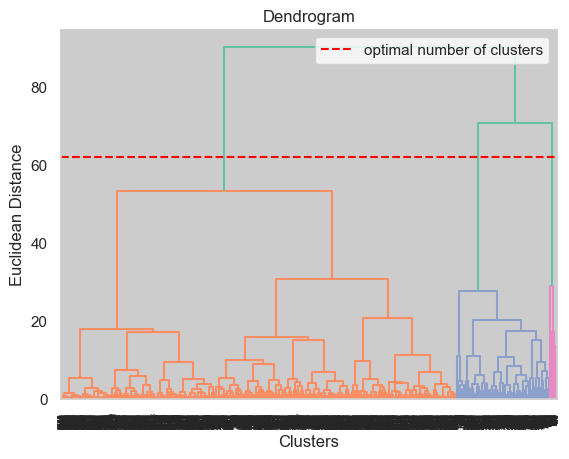

In [59]:
# create linkage for agglomerative clustering, and the dendrogram for the linkage. The optimal number of clusters based on the dendrogram.

Z = linkage(X, method='ward')
dend = dendrogram(Z)
figsize =(12, 12)
plt.axhline(y=62, color='r', linestyle='--', label='optimal number of clusters')
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.legend()
plt.show()


**RESULTS**

- From the Kmeans Algorithm, the dataset is 2 groups using the unsupervised k-means algorithm.
- From the DBSCAN Algorithm, the number of clusters are 3, the Silhouette Coefficient is 0.7, which means that the data point i is very compact within the cluster to which it belongs and far away from the other clusters as the value is near 1.
- From Hierarchical Algorithm, the Euclidean distance method was used to make a dendrogram with k = 4. As can be seen, the clusters are very close to each other.The red dotted line indicates that the number of cluster is 3.



**CONCLUSION**

In the he violent crime category dataset, the label column based on the various crime category such as murder, rape, robbery and assault. The aim is to look for connections between the crimes. Clustering the dataset provided insights into that. The value of k = 2 was set for defining the number of clusters which was calculated using the Elbow method and Silhouette method. From the above plots, we can conclude that the clusters are overlapping and can be improved.